# Proyek Analisis Data: E-commerce Public Dataset
- **Nama:** Sulthan Nauval Abdillah
- **Email:** m012b4ky4230@bangkit.academy
- **ID Dicoding:** sulthannauval13

## Menentukan Pertanyaan Bisnis

- Bagaimana demografi pelanggan dan penjual yang dimiliki?
- Bagaimana lokasi seller (state) berkorelasi dengan performa mereka?
- Apa hubungan antara jumlah pembeli dengan skor review?
- Apa kategori produk dengan penjualan terbaik dan terburuk?
- Berapa banyak pesanan yang sampai sesuai dengan estimasi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv("Dataset\customers_dataset.csv")
orders_df = pd.read_csv("Dataset\orders_dataset.csv")
orderItems_df = pd.read_csv("Dataset\order_items_dataset.csv")
sellers_df = pd.read_csv("Dataset\sellers_dataset.csv")
products_df = pd.read_csv("Dataset\products_dataset.csv")
productsCategory_df = pd.read_csv("Dataset\product_category_name_translation.csv")
orderReviews_df = pd.read_csv("Dataset\order_reviews_dataset.csv")

**Insight:**
- `customer_df` digunakan untuk menjawab pertanyaan nomor 1 karena terdapat fitur yang diperlukan seperti 'customer_state'
- `orders_df` digunakan untuk menjawab pertanyaan nomor 5 karena terdapat fitur yang diperlukan seperti 'order_delivered_customer_date' dan 'order_estimated_delivery_date'
- `ordersItems_df` digunakan untuk menjawab pertanyaan nomor 2 dan 3 karena terdapat fitur yang diperlukan seperti 'order_item_id'
- `sellers_df` digunakan untuk menjawab pertanyaan nomor 1 karena terdapat fitur yang diperlukan seperti 'seller_state'
- `products_df` digunakan untuk menjawab pertanyaan nomor 3 karena terdapat fitur yang diperlukan seperti 'product_category_name'
- `productsCategory_df` digunakan untuk menjawab pertanyaan nomor 3 karena terdapat fitur yang diperlukan seperti 'product_category_name' dan 'product_category_name_english'
- `orderReviews_df` digunakan untuk menjawab pertanyaan nomor 2 dan 4 karena terdapat fitur yang diperlukan seperti 'review_score'

### Assessing Data

`customers_df`

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [5]:
print('Jumlah Duplikasi:',customers_df.duplicated().sum())

Jumlah Duplikasi: 0


`orders_df`

In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
print('Jumlah Duplikasi:',orders_df.duplicated().sum())

Jumlah Duplikasi: 0


In [8]:
print('Jumlah Missing Value:\n',orders_df.isna().sum())

Jumlah Missing Value:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


`orderItems_df`

In [9]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
print('Jumlah Duplikasi:',orderItems_df.duplicated().sum())

Jumlah Duplikasi: 0


`sellers_df`

In [11]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [12]:
print('Jumlah Duplikasi:',sellers_df.duplicated().sum())

Jumlah Duplikasi: 0


`products_df`

In [13]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [14]:
print('Jumlah Duplikasi:',products_df.duplicated().sum())

Jumlah Duplikasi: 0


In [15]:
print('Jumlah Missing Value:\n',products_df.isna().sum())

Jumlah Missing Value:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


`productCategory_df`

In [16]:
productsCategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [17]:
print('Jumlah Duplikasi:',productsCategory_df.duplicated().sum())

Jumlah Duplikasi: 0


`orderReviews_df`

In [18]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [19]:
print('Jumlah Duplikasi:',orderReviews_df.duplicated().sum())

Jumlah Duplikasi: 0


In [20]:
print('Jumlah Missing Value:\n',orderReviews_df.isna().sum())

Jumlah Missing Value:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


**Insight:**
- `customers_df`, `orderItems_df`, `sellers_df`, `productsCategory_df` tidak perlu cleaning
- `orders_df` terdapat data yang kosong pada fitur yang diperlukan yaitu 'order_delivered_customer_date'
- `products_df` terdapat data yang kosong pada fitur yang diperlukan yaitu 'product_category_name'
- `orderReviews_df` terdapat data yang kosong, tetapi bukan pada fitur yang diperlukan, jadi bisa diabaikan atau bisa dihapus fitur dengan data kosongnya

### Cleaning Data

`orders_df`

Handling Missing Value

In [21]:
orders_df = orders_df.dropna()
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

`products_df`

Handling Missing Value

In [22]:
products_df = products_df.dropna()
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

`orderReviews_df`

Handling Missing Value pada Fitur yang kurang penting dengan Drop Column

In [23]:
orderReviews_df = orderReviews_df.drop(columns=['review_comment_title','review_comment_message'], axis=1)
orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**Insight:**
- Missing value dihilangkan dengan fungsi `.dropna()` bukan dengan pengisian data karena tipe data pada data yang hilang bukan sebuah tipe data numerik yang bisa diisi dengan `mean`, `median`, dsb. dari data yang lainnya
- Dikarenakan data tidak ada yang terduplikasi, kita tidak perlu melakukan penghapusan data duplikat hanya perlu penghapusan data yang kosong

## Exploratory Data Analysis (EDA)

### Explore All Data Frame

**#1**

In [24]:
customers_data_df = pd.merge(orderItems_df, orders_df, on='order_id')
customers_data_df = pd.merge(customers_data_df, customers_df, on='customer_id')
customers_data_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Mengambil Fitur yang Diperlukan Saja untuk Data Customers

In [25]:
columns_keep = ['order_id', 'order_item_id', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                'customer_id','customer_zip_code_prefix', 'customer_city', 'customer_state']
customers_data_df = customers_data_df[columns_keep]
customers_data_df.head()

,order_id,order_item_id,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-20 23:43:48,2017-09-29 00:00:00,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-12 16:04:24,2017-05-15 00:00:00,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-22 13:19:16,2018-02-05 00:00:00,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-14 13:32:39,2018-08-20 00:00:00,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-03-01 16:42:31,2017-03-17 00:00:00,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP


Membuat Fitur/Kolom Baru untuk Membantu Menjawab Pertanyaan No 5

In [26]:
customers_data_df['delivery_status'] = customers_data_df['order_delivered_customer_date'] > customers_data_df['order_estimated_delivery_date']
customers_data_df.head()

,order_id,order_item_id,order_delivered_customer_date,order_estimated_delivery_date,customer_id,customer_zip_code_prefix,customer_city,customer_state,delivery_status
0,00010242fe8c5a6d1ba2dd792cb16214,1,2017-09-20 23:43:48,2017-09-29 00:00:00,3ce436f183e68e07877b285a838db11a,28013,campos dos goytacazes,RJ,False
1,00018f77f2f0320c557190d7a144bdd3,1,2017-05-12 16:04:24,2017-05-15 00:00:00,f6dd3ec061db4e3987629fe6b26e5cce,15775,santa fe do sul,SP,False
2,000229ec398224ef6ca0657da4fc703e,1,2018-01-22 13:19:16,2018-02-05 00:00:00,6489ae5e4333f3693df5ad4372dab6d3,35661,para de minas,MG,False
3,00024acbcdf0a6daa1e931b038114c75,1,2018-08-14 13:32:39,2018-08-20 00:00:00,d4eb9395c8c0431ee92fce09860c5a06,12952,atibaia,SP,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,2017-03-01 16:42:31,2017-03-17 00:00:00,58dbd0b2d70206bf40e62cd34e84d795,13226,varzea paulista,SP,False


Mengubah Kode State Menjadi Nama Lengkapnya

In [27]:
state_names = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AM': 'Amazonas', 'AP': 'Amapá', 'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal',
    'ES': 'Espírito Santo', 'GO': 'Goiás', 'MA': 'Maranhão', 'MG': 'Minas Gerais', 'MS': 'Mato Grosso do Sul', 
    'MT': 'Mato Grosso', 'PA': 'Pará', 'PB': 'Paraíba', 'PE': 'Pernambuco', 'PI': 'Piauí', 'PR': 'Paraná',
    'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RO': 'Rondônia', 'RR': 'Roraima', 'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina', 'SE': 'Sergipe', 'SP': 'São Paulo', 'TO': 'Tocantins'
}

customers_data_df['customer_state'] = customers_data_df['customer_state'].map(state_names)

**#2**

In [28]:
sellers_product_data_df = pd.merge(orderItems_df, orders_df, on='order_id')
sellers_product_data_df = pd.merge(sellers_product_data_df, orderReviews_df, on='order_id')
sellers_product_data_df = pd.merge(sellers_product_data_df, products_df, on='product_id')
sellers_product_data_df = pd.merge(sellers_product_data_df, productsCategory_df, on='product_category_name')
sellers_product_data_df = pd.merge(sellers_product_data_df, sellers_df, on='seller_id')
sellers_product_data_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR


Mengambil Fitur yang Diperlukan Saja untuk Data Seller dan Product

In [29]:
columns_keep = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'customer_id',
                'price', 'review_score','product_category_name_english', 'seller_state']
sellers_product_data_df = sellers_product_data_df[columns_keep]
sellers_product_data_df.head()

,order_id,order_item_id,product_id,seller_id,customer_id,price,review_score,product_category_name_english,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,3ce436f183e68e07877b285a838db11a,58.90,5,cool_stuff,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,f6dd3ec061db4e3987629fe6b26e5cce,239.90,4,pet_shop,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,6489ae5e4333f3693df5ad4372dab6d3,199.00,5,furniture_decor,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,d4eb9395c8c0431ee92fce09860c5a06,12.99,4,perfumery,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,58dbd0b2d70206bf40e62cd34e84d795,199.90,5,garden_tools,PR


Mengubah Kode State Menjadi Nama Lengkapnya

In [30]:
state_names = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AM': 'Amazonas', 'AP': 'Amapá', 'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal',
    'ES': 'Espírito Santo', 'GO': 'Goiás', 'MA': 'Maranhão', 'MG': 'Minas Gerais', 'MS': 'Mato Grosso do Sul', 
    'MT': 'Mato Grosso', 'PA': 'Pará', 'PB': 'Paraíba', 'PE': 'Pernambuco', 'PI': 'Piauí', 'PR': 'Paraná',
    'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RO': 'Rondônia', 'RR': 'Roraima', 'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina', 'SE': 'Sergipe', 'SP': 'São Paulo', 'TO': 'Tocantins'
}

sellers_product_data_df['seller_state'] = sellers_product_data_df['seller_state'].map(state_names)

Convert to CSV

In [31]:
customers_data_df.to_csv("Dashboard/customers_data.csv", index=False)
sellers_product_data_df.to_csv("Dashboard/seller_product_data.csv", index=False)

**Insight:**
- Berhasil membuat 2 buah DataFrame baru dengan menyingkirkan fitur/kolom yang kurang penting untuk menjawab pertanyaan atau dengan membuat fitur/kolom baru. DataFrame pertama untuk kebutuhan menjawab yang berhubungan dengan customer dan DataFrame kedua untuk kebutuhan menjawab yang berhubungan dengan seller dan product-nya
- Berhasil juga meng-convert menjadi 2 buah file .csv yang digunakan untuk membuat Dashboard nanti

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [32]:
bystate_df = customers_data_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index()
bystate_df.rename(columns={
    "customer_id": "Jumlah Pelanggan", "customer_state": "State"
}, inplace=True)
bystate_df

,State,Jumlah Pelanggan
0,São Paulo,40489
1,Rio de Janeiro,12351
2,Minas Gerais,11352
3,Rio Grande do Sul,5342
4,Paraná,4923
5,Santa Catarina,3547
6,Bahia,3256
7,Distrito Federal,2080
8,Espírito Santo,1995
9,Goiás,1957


In [33]:
bystate_df2 = sellers_product_data_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).reset_index()
bystate_df2.rename(columns={
    "seller_id": "Jumlah Penjual", "seller_state": "State"
}, inplace=True)
bystate_df2

,State,Jumlah Penjual
0,São Paulo,1731
1,Paraná,329
2,Minas Gerais,226
3,Santa Catarina,180
4,Rio de Janeiro,161
5,Rio Grande do Sul,124
6,Goiás,37
7,Distrito Federal,30
8,Espírito Santo,22
9,Bahia,18


### Pertanyaan 2:

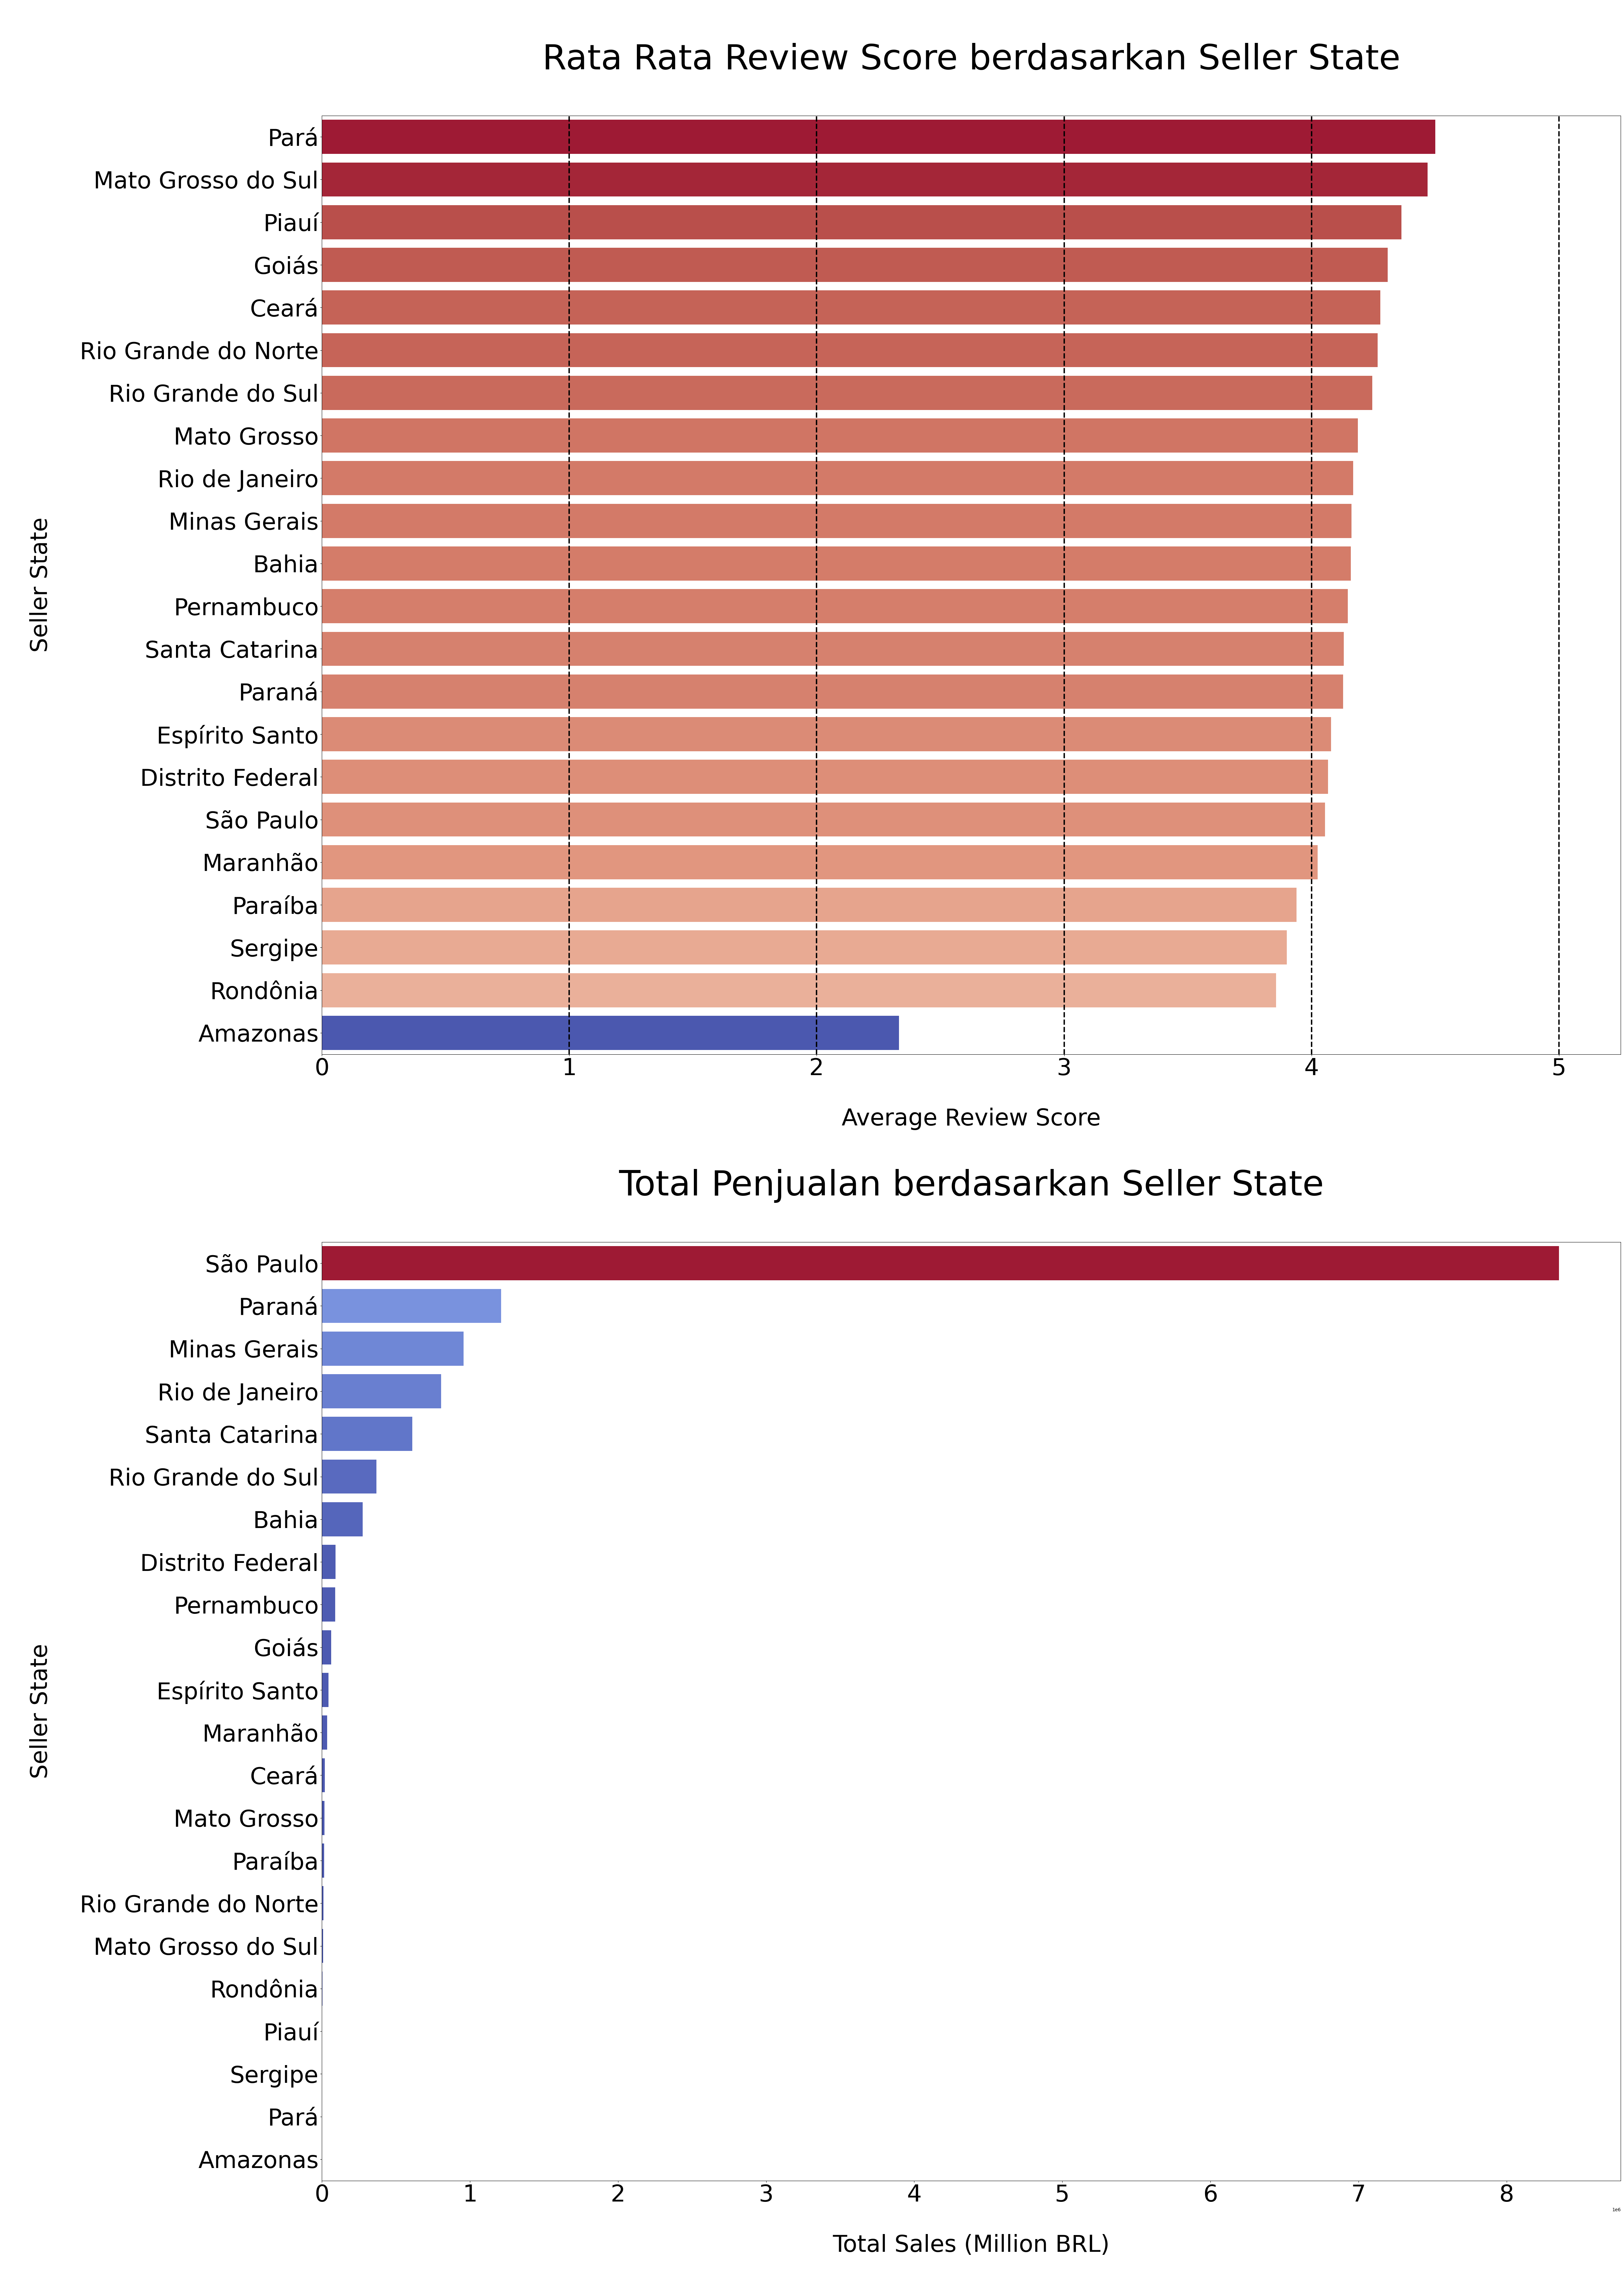

In [34]:
state_performance = sellers_product_data_df.groupby('seller_state').agg({
    'review_score': 'mean',
    'price': 'sum'
}).reset_index()
state_performance.columns = ['seller_state', 'avg_review_score', 'total_sales']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(50, 80))

state_performance1 = state_performance.sort_values(by='avg_review_score', ascending=False)
sns.barplot(x='avg_review_score', y='seller_state', hue='avg_review_score', 
            data=state_performance1, palette='coolwarm', ax=ax[0])
ax[0].set_title('\nRata Rata Review Score berdasarkan Seller State\n', fontsize=75)
ax[0].set_xlabel('\nAverage Review Score\n', fontsize=50)
ax[0].set_ylabel('\nSeller State\n', fontsize=50)
ax[0].tick_params(axis='y', labelsize=50)
ax[0].tick_params(axis='x', labelsize=50)
ax[0].legend().remove()
for score in range(1, 6):
    ax[0].axvline(x=score, color='black', linestyle='--', linewidth=3)

state_performance2 = state_performance.sort_values(by='total_sales', ascending=False)
sns.barplot(x='total_sales', y='seller_state', hue='total_sales',
            data=state_performance2, palette='coolwarm', ax=ax[1])
ax[1].set_title('\nTotal Penjualan berdasarkan Seller State\n', fontsize=75)
ax[1].set_xlabel('\nTotal Sales (Million BRL)\n', fontsize=50)
ax[1].set_ylabel('\nSeller State\n', fontsize=50)
ax[1].tick_params(axis='y', labelsize=50)
ax[1].tick_params(axis='x', labelsize=50)
ax[1].legend().remove()

### Pertanyaan 3:

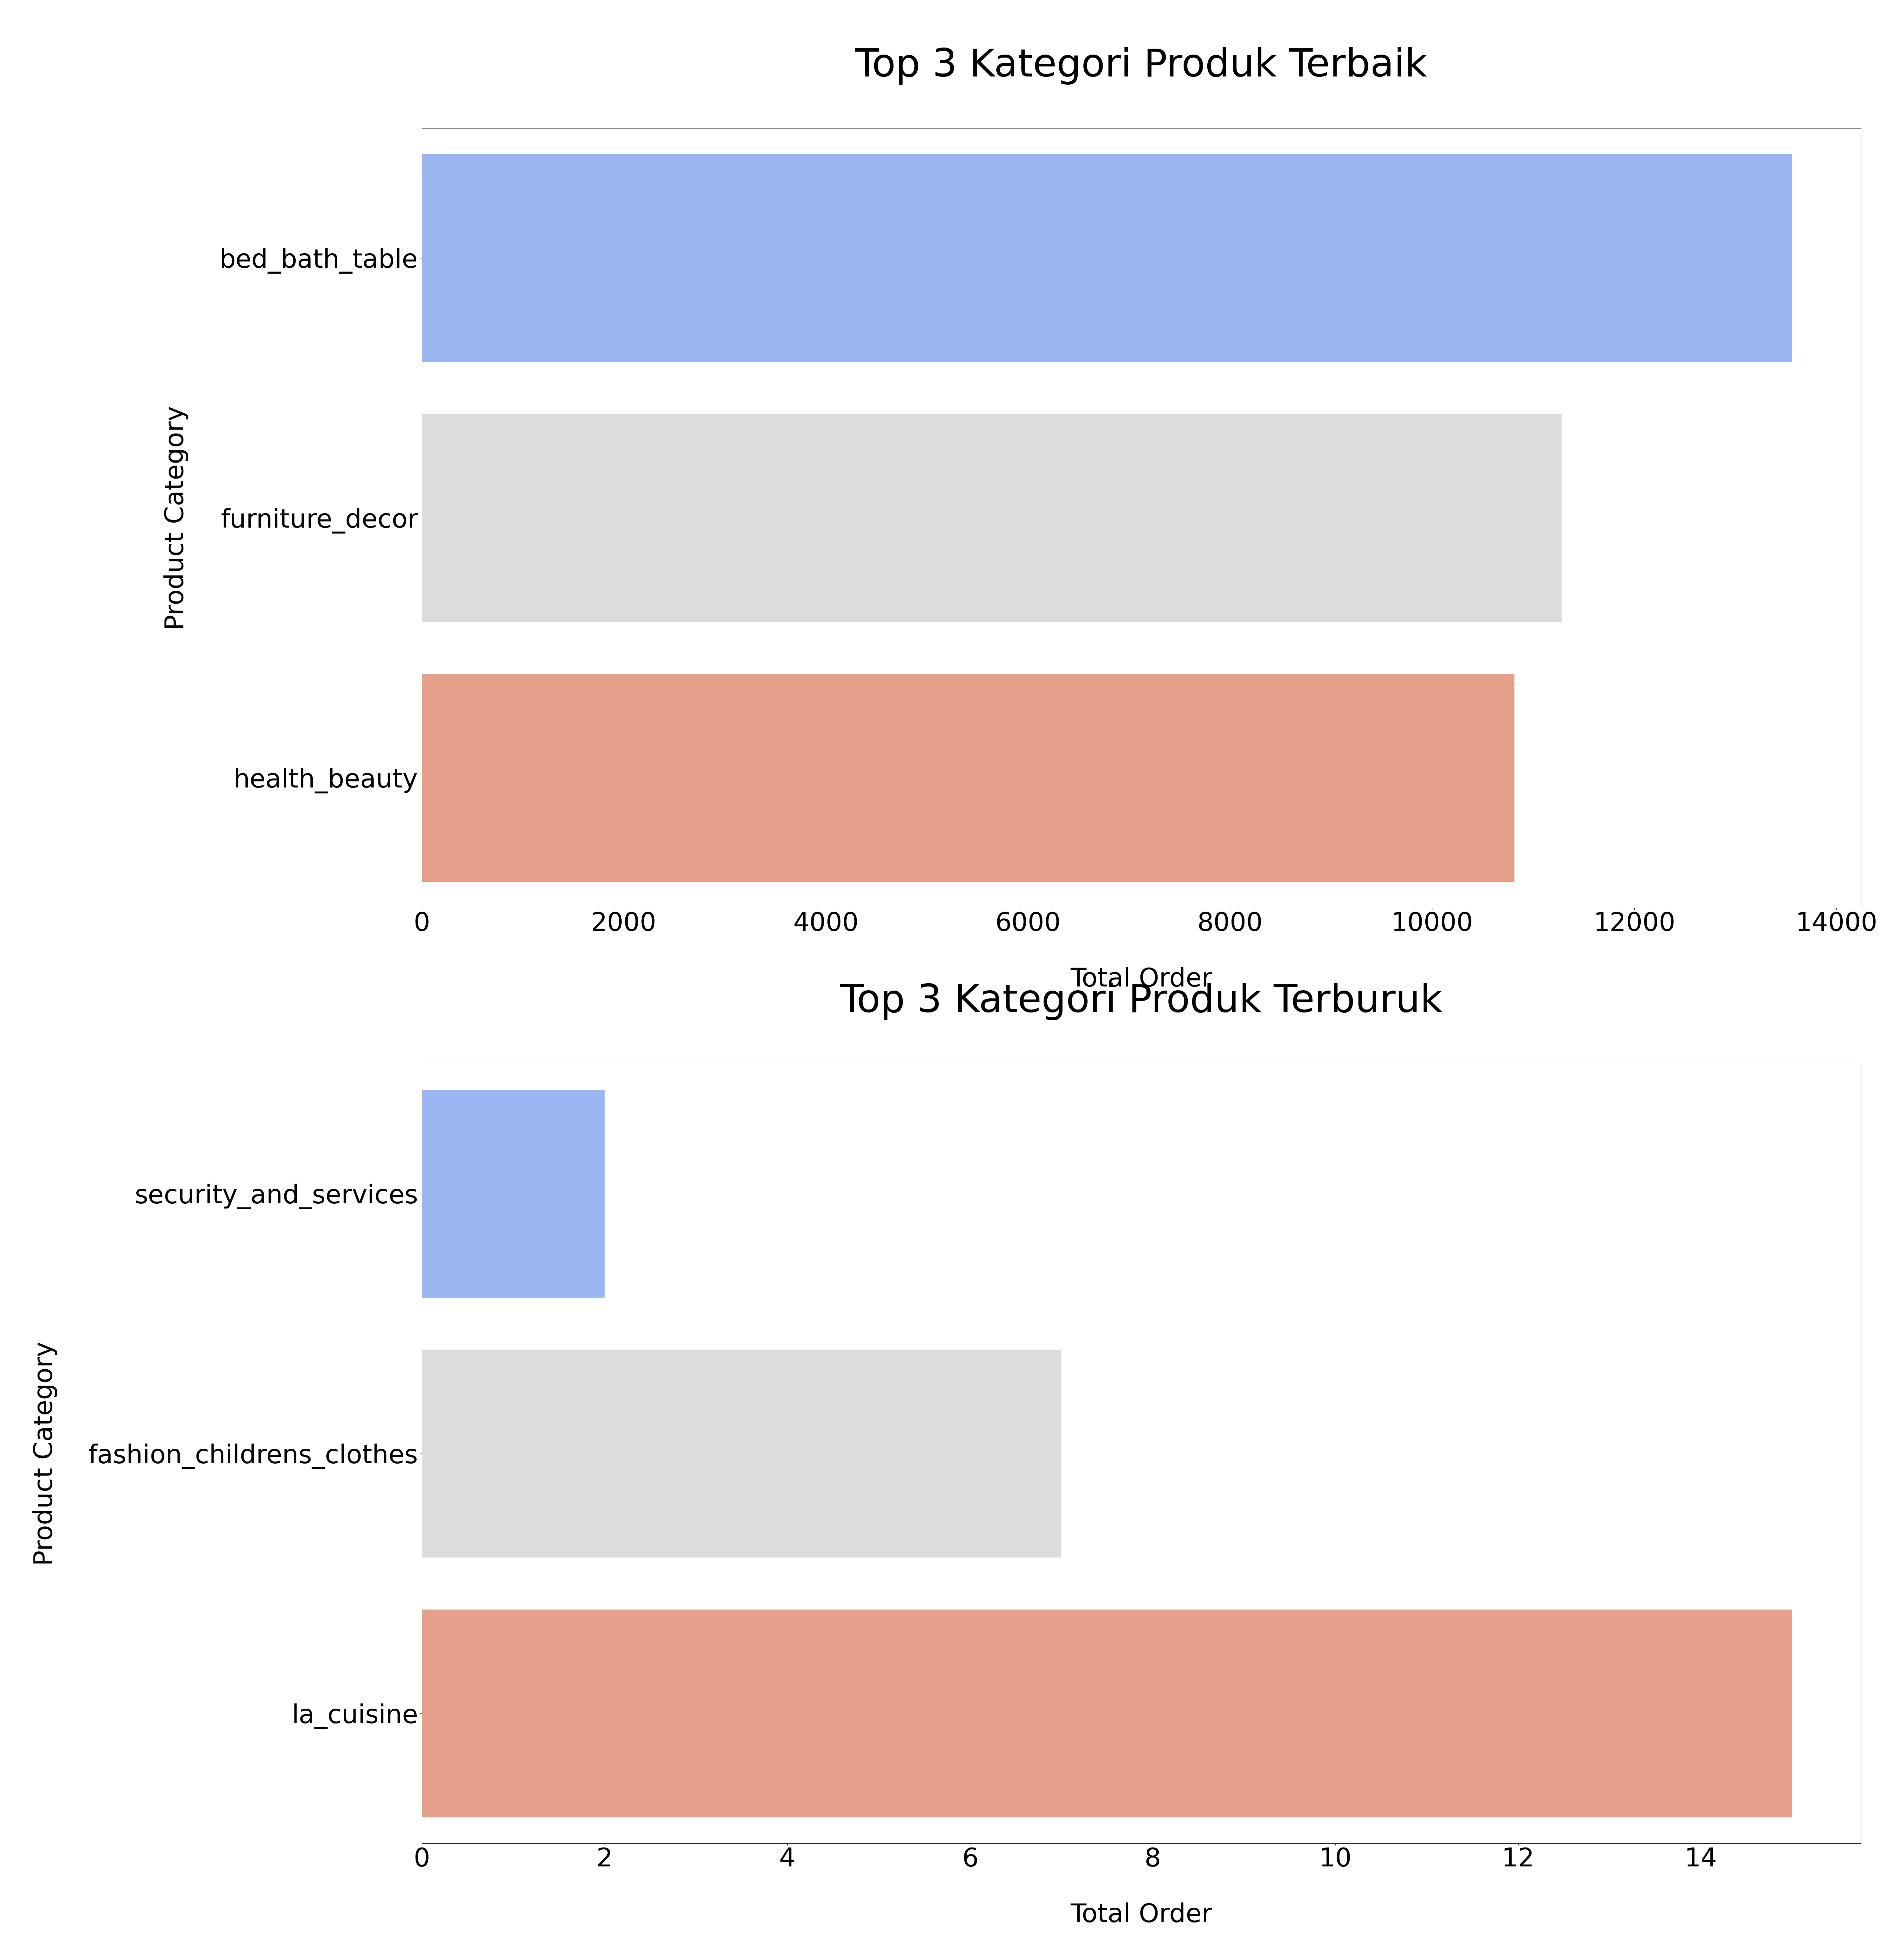

In [35]:
sum_order_items_df = sellers_product_data_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "order_item_id": "order_count"
}, inplace=True)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(50, 60))

sns.barplot(x="order_count", y="product_category_name_english", hue="product_category_name_english",
            data=sum_order_items_df.head(3), palette='coolwarm', ax=ax[0])
ax[0].set_ylabel('\nProduct Category\n', fontsize=50)
ax[0].set_xlabel('\nTotal Order\n', fontsize=50)
ax[0].set_title('\nTop 3 Kategori Produk Terbaik\n', fontsize=75)
ax[0].tick_params(axis='x', labelsize=50)
ax[0].tick_params(axis='y', labelsize=50)

sns.barplot(x="order_count", y="product_category_name_english", hue="product_category_name_english",
            data=sum_order_items_df.sort_values(by="order_count", ascending=True).head(3), 
            palette='coolwarm', ax=ax[1])
ax[1].set_ylabel('\nProduct Category\n', fontsize=50)
ax[1].set_xlabel('\nTotal Order\n', fontsize=50)
ax[1].set_title('\nTop 3 Kategori Produk Terburuk\n', fontsize=75)
ax[1].tick_params(axis='x', labelsize=50)
ax[1].tick_params(axis='y', labelsize=50)

### Pertanyaan 4:

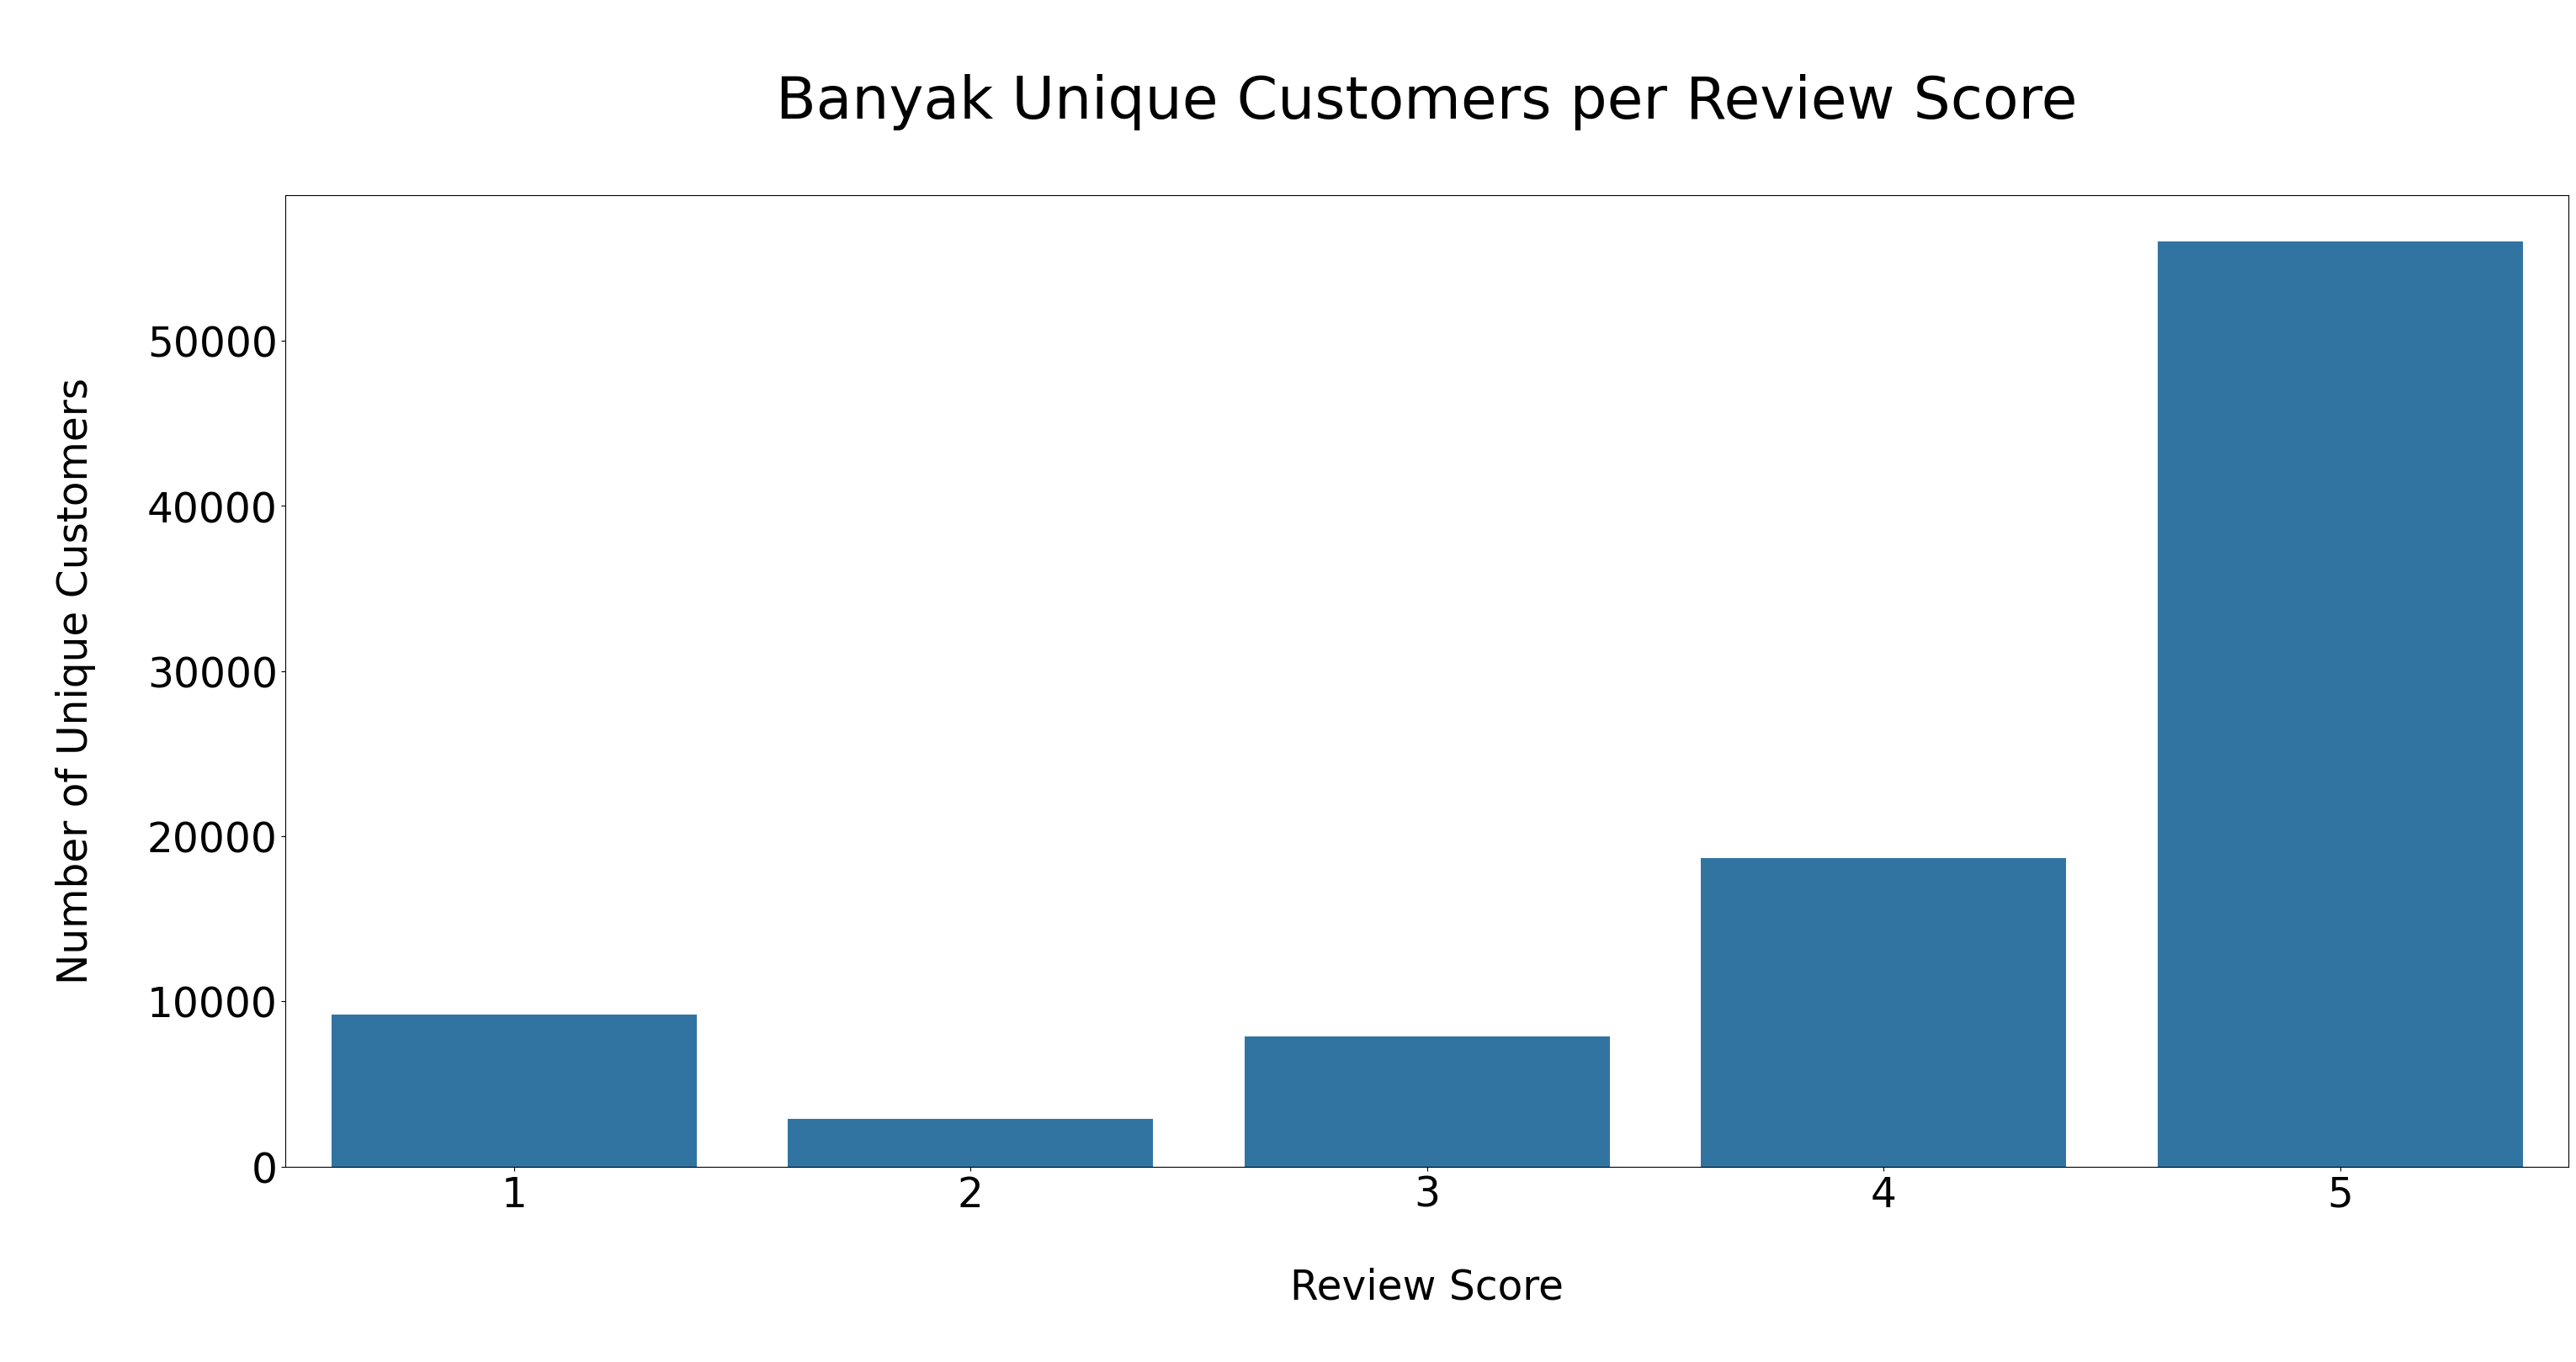

In [36]:
review_count = sellers_product_data_df.groupby('review_score')['customer_id'].nunique().reset_index()
review_count.columns = ['review_score', 'unique_customers']

fig, ax = plt.subplots(figsize=(35, 15))

sns.barplot(x='review_score', y='unique_customers', data=review_count, ax=ax)
ax.set_title('\nBanyak Unique Customers per Review Score\n', fontsize=50)
ax.set_xlabel('\nReview Score\n', fontsize=35)
ax.set_ylabel('\nNumber of Unique Customers\n', fontsize=35)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)

### Pertanyaan 5:

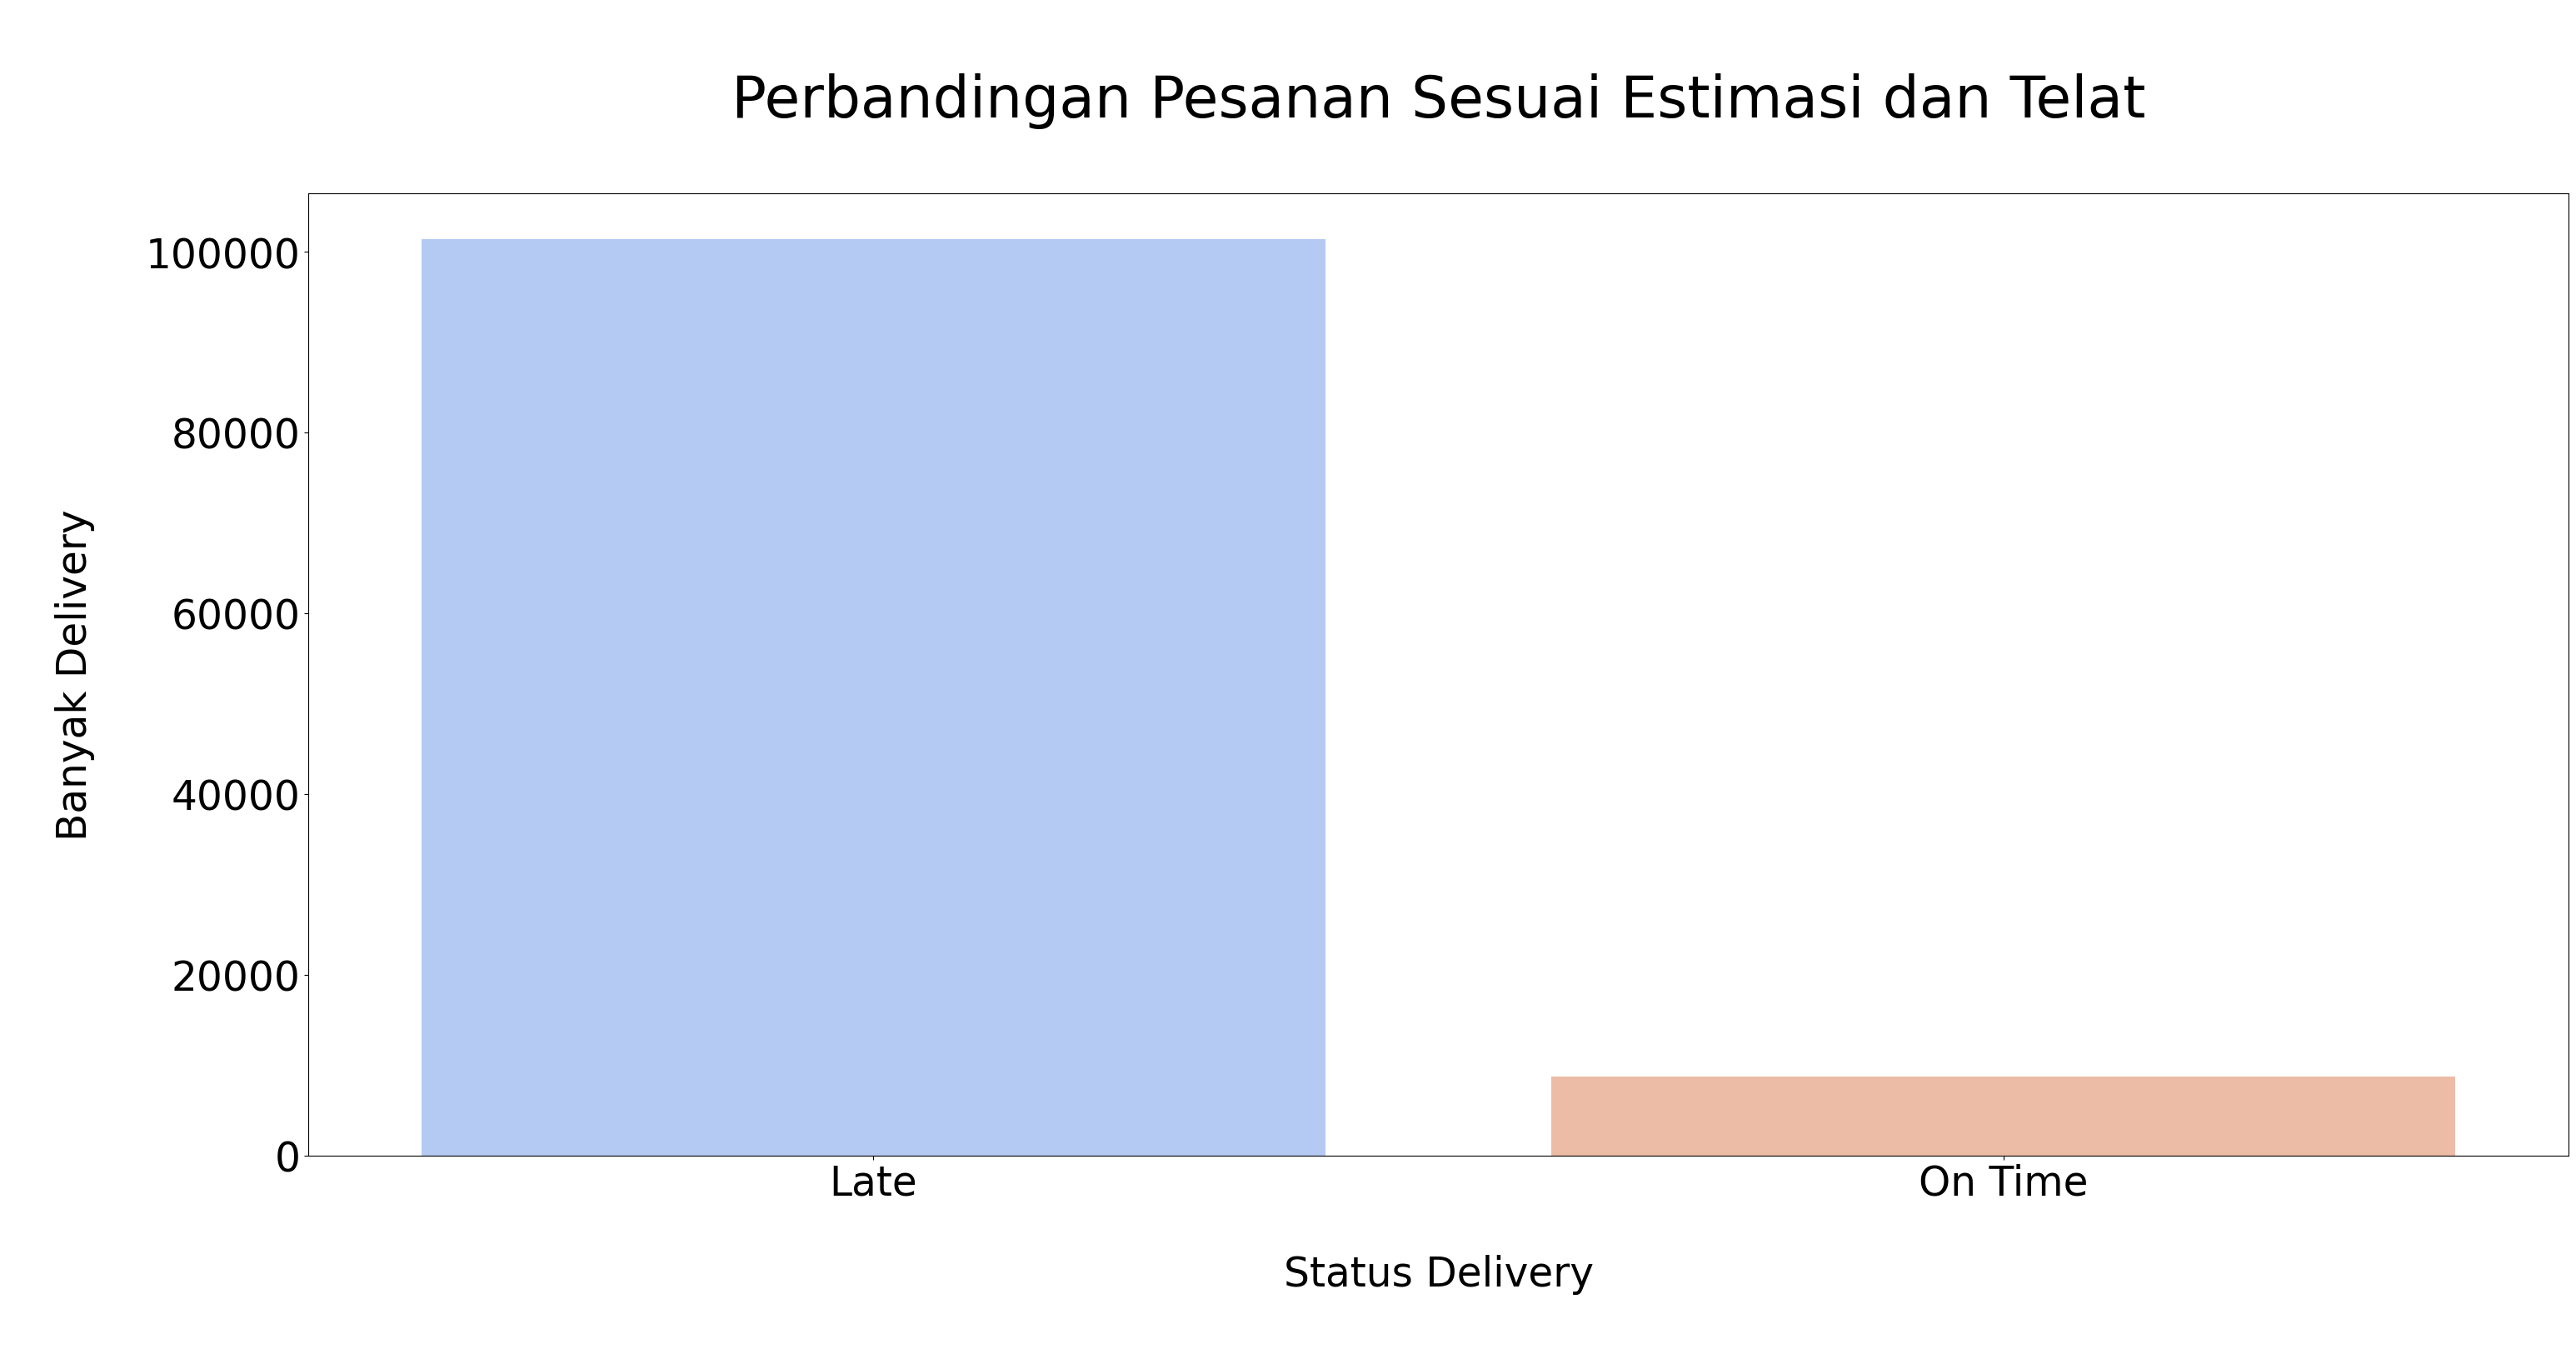

In [37]:
delivery_status_count = customers_data_df['delivery_status'].value_counts().reset_index()
delivery_status_count.columns = ['Status', 'Count']

fig, ax = plt.subplots(figsize=(35, 15))

sns.barplot(x='Status', y='Count', hue='Status', data=delivery_status_count, 
            palette='coolwarm', ax=ax)
ax.set_title('\nPerbandingan Pesanan Sesuai Estimasi dan Telat\n', fontsize=50)
ax.set_xlabel('\nStatus Delivery\n', fontsize=35)
ax.set_ylabel('\nBanyak Delivery\n', fontsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xticks(ticks=[0, 1], labels=['Late', 'On Time'])
ax.tick_params(axis='y', labelsize=35)
ax.legend().remove()

### **Insight:**
- Pertanyaan-pertanyaan di atas sudah semua dapat di visualisasikan, hampir semua visualisasi menggunakan barplot karena merupakan visualisasi yang paling cocok dengan pertanyaannya
- Penambahan pallette menjadi sangat penting di sini karena selain dapat menciptakan visualisasi yang lebih jelas dan cantik, kita juga langsung dapat menggolongkan berdasarkan warnanya

## Conclusion

- Conclution pertanyaan 1:\
Customer dan seller terbanyak masih dipegang oleh state dengan penduduk terbanyak hal ini ditunjukkan oleh state seperti São Paulo, Rio de Janeiro dan Minas Gerais yang berada di Top 5

- Conclution pertanyaan 2:\
Ternyata state dengan banyak customer belum tentu mendapat review terbaik hal tersebut bisa dilihat state seperti São Paulo, Rio de Janeiro dan Minas Gerais yang bahkan tidak masuk Top 5 tetapi review mereka masih dapat dikatakan baik yaitu di atas angka 4. Kemudian di sisi lain terdapat state yang memiliki review buruk yaitu Amazonas, hal ini masih masuk akal mengingat kondisi state yang sangat jauh dari state lainnya sehingga dapat mengurangi quality control, ketepatan estimasi datang, dsb./
Selain itu untuk total penjualan São Paulo sangat timpang sekali dengan state lainnya mengingat banyaknya customer dan seller yang ada di sana

- Conclution pertanyaan 3:\
Kategori produk dengan penjualan terbaik adalah furnitur, decor dan keperluan kecantikan sedangkan produk dengan penjualan terburuk adalah security, fashion anak, dan la cuisine

- Conclution pertanyaan 4:\
Review score yang bagus sangat mempengaruhi penjualan dapat dilihat dalam visualisasi bahwa ketimpangan jumlah terjadi untuk review score 5 yang sampai >50.000 dan berbanding ~20.000 untuk review score 4.

- Conclution pertanyaan 4:\
~100.000 pesanan yang diantar tidak sesuai dengan estimasi perkiraan datang berbanding <20.000 yang hanya datang tepat waktu, hal tersebut perlu dilakukan lagi penyeledikan apakah pesanan lama waktu di kurir, penjual yang lama mengirim atau ada hal lainnya sebab tidak sampai 20% barang sampai sesuai dengan estimasi